## Step 1: Load and Inspect the Dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:

# Load dataset
df = pd.read_csv('../data/personality_dataset.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2900, 8)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Step 2: Explore the Data (Column Types & Cleaning)


In [27]:
# Check for missing values and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [28]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [29]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [30]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [31]:
print("Unique values in 'Stage_fear':")
print(df['Stage_fear'].unique())

print("\nUnique values in 'Drained_after_socializing':")
print(df['Drained_after_socializing'].unique())

print("\nValue counts for 'Personality':")
print(df['Personality'].value_counts())

# Data looks clean right from the beginning... sus

Unique values in 'Stage_fear':
['No' 'Yes']

Unique values in 'Drained_after_socializing':
['No' 'Yes']

Value counts for 'Personality':
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


In [32]:
# # Create helper columns for plotting with labels
# df['Personality_label'] = df['Personality']
# df['Stage_fear_label'] = df['Stage_fear']
# df['Drained_after_socializing_label'] = df['Drained_after_socializing'] 

# # Map Yes/No to 1/0
# df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
# df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# # Map Personality to 1/0
# df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

# Confirm the changes
df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Step 3: Exploratory Data Analysis (EDA) & Visualization


Goal: Understand how the features differ between introverts and extroverts visually.

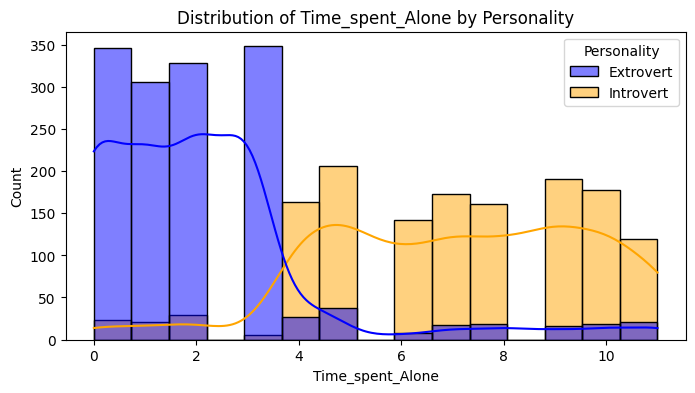

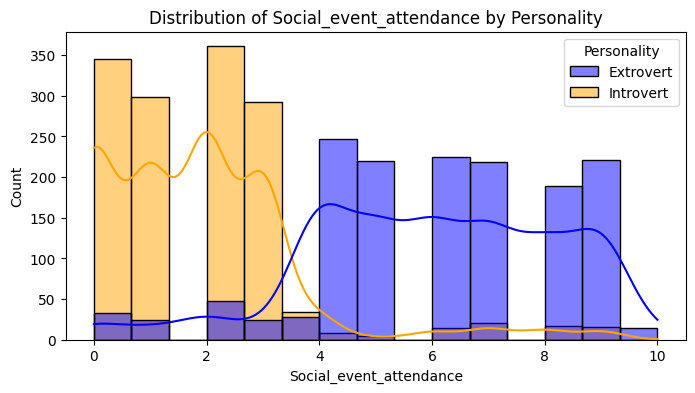

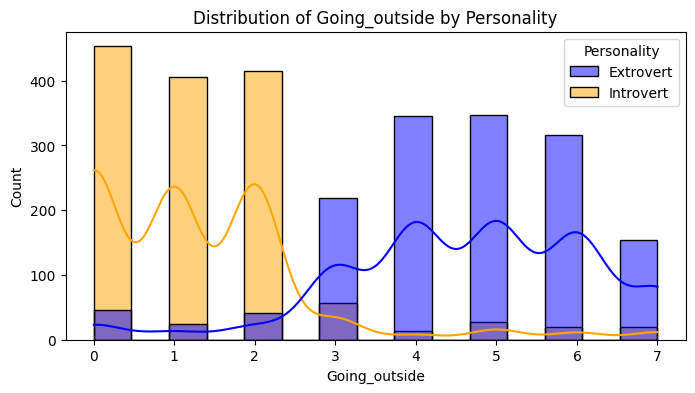

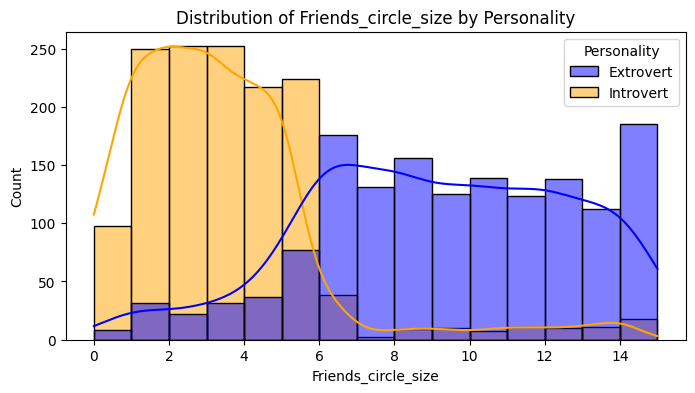

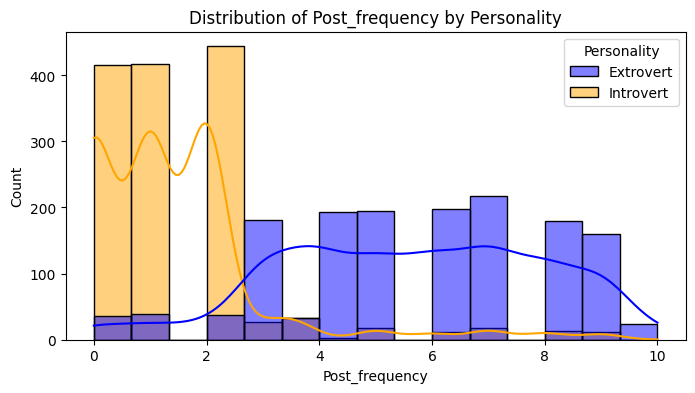

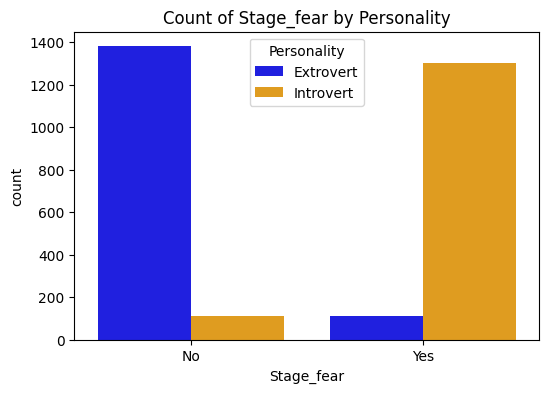

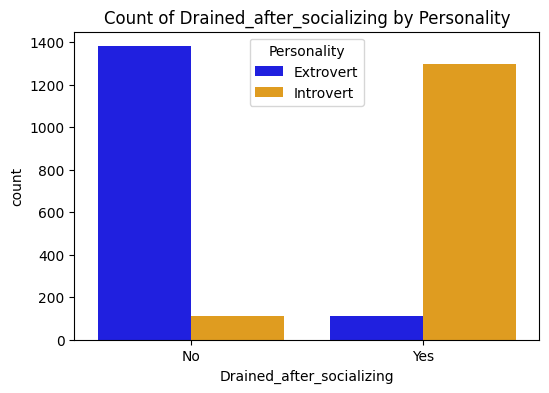

In [35]:

# Numeric features
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                    'Friends_circle_size', 'Post_frequency']

# Plot histograms
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='Personality', bins=15, kde=True, palette=['blue', 'orange'])
    plt.title(f'Distribution of {feature} by Personality')
    plt.show()

# Plot count plots for binary features
binary_features = ['Stage_fear', 'Drained_after_socializing']

for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Personality', palette=['blue', 'orange'])
    plt.title(f'Count of {feature} by Personality')
    plt.show()


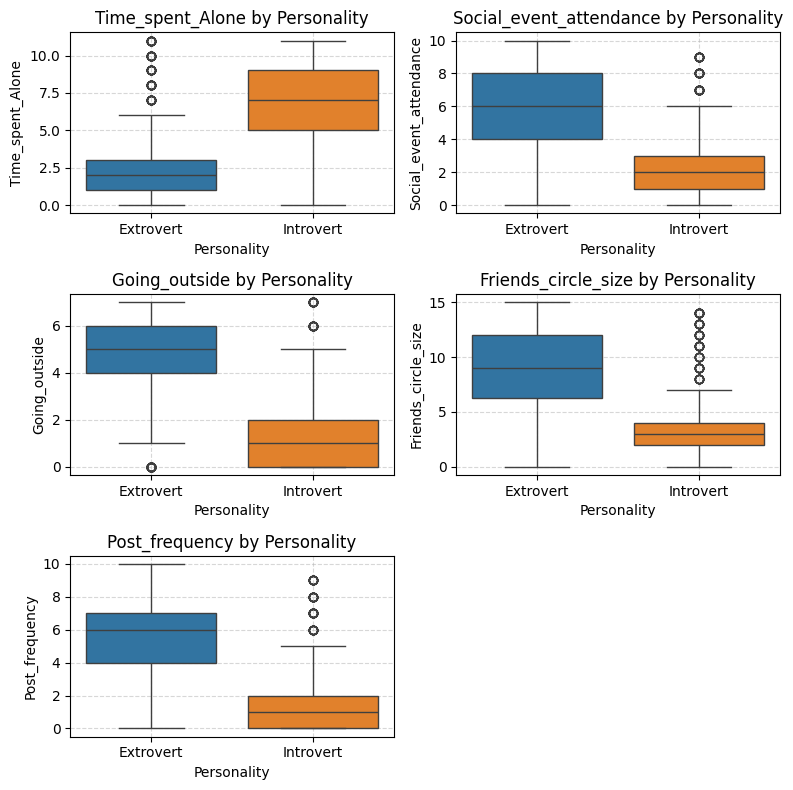

In [41]:
plt.figure(figsize=(8, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Personality', y=col, data=df, hue='Personality')
    plt.title(f'{col} by {'Personality'}')
    plt.ylabel(col)
    plt.xlabel('Personality')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

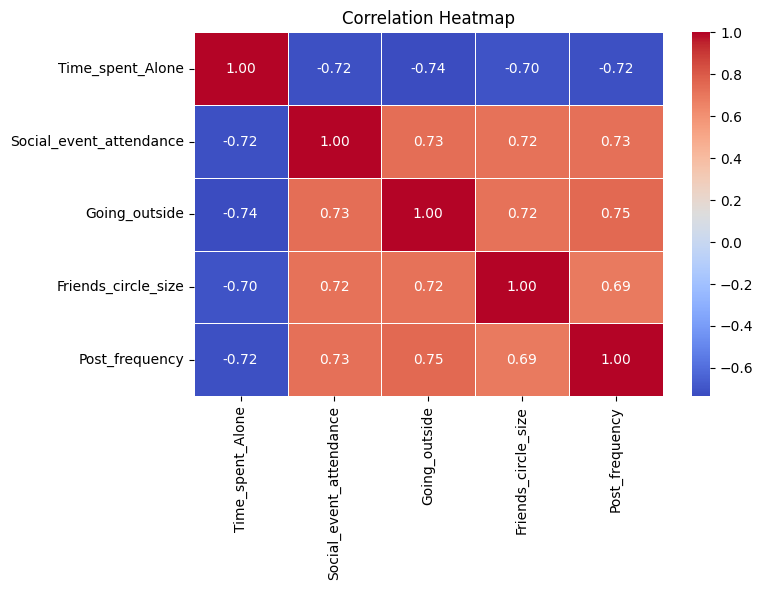

                         Time_spent_Alone  Social_event_attendance  \
Time_spent_Alone                 1.000000                -0.718139   
Social_event_attendance         -0.718139                 1.000000   
Going_outside                   -0.735247                 0.731941   
Friends_circle_size             -0.701665                 0.718518   
Post_frequency                  -0.718072                 0.727732   

                         Going_outside  Friends_circle_size  Post_frequency  
Time_spent_Alone             -0.735247            -0.701665       -0.718072  
Social_event_attendance       0.731941             0.718518        0.727732  
Going_outside                 1.000000             0.718327        0.754758  
Friends_circle_size           0.718327             1.000000        0.690381  
Post_frequency                0.754758             0.690381        1.000000  


In [ ]:
corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap')
plt.tight_layout()
plt.show()


### 🔍 Key Observations:


1. __Strong negative correlation between:__
  * Time_spent_Alone and:

    + Social_event_attendance (-0.72)

    + Going_outside (-0.74)

    + Friends_circle_size (-0.70)

    + Post_frequency (-0.72)

 📌 Interpretation:

People who spend more time alone tend to engage less in social activities — not surprising, but this high inverse correlation suggests that these features are capturing similar social behavior.



2. __Strong positive correlations between social activity features:__
* Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency: all are positively correlated (0.69–0.75).

📌 Interpretation:

These likely represent a latent variable like “Sociability” or “Outgoing Behavior.” 

